In [41]:
from google_photo_api import GooglePhotoHelper
import json
from PIL import Image
from io import BytesIO
import piexif
import requests
import matplotlib.pyplot as plt
import re
%matplotlib inline 

In [43]:
def generate_face_dataset_from_google_album(album_name, size):
    '''
    return a list of url / name tuple
    '''
    helper = GooglePhotoHelper()
    album_list = helper.find_albums_by_name('Ada')
    if len(album_list) != 1:
        raise Exception(f'There should be only one album named {album_name}!')
    url_list = helper.list_face_download_urls_from_album(album_list[0]['id'], size=size)
    return url_list
    # data_json_str_list = [json.dumps({"image_url": url, "label": album_name}) for url in url_list]
    # # write json lines to file:
    # with open(album_name + '_face_dataset.json', 'w') as f:
    #     f.writelines(data_json_str_list)

def read_image_info_from_url(url):
    r = requests.get(url)
    image = Image.open(BytesIO(r.content))
    exif_dict = piexif.load(image.info['exif'])
    d = r.headers['content-disposition']
    fname = re.findall("filename=\"(.+)\"", d)[0]
    return image, fname, exif_dict['Exif'][piexif.ExifIFD.UserComment].decode('utf-8')

# read_image_info_from_url('https://lh3.googleusercontent.com/lr/AGiIYOVkJAGcLO64zWnjDlUsmGiCPXis3GPh12ddfPl2xVkoe66w2ZBCRhn1ssWb2lYcAAwg2sQU8IZ6korV0rKYaQGMmV83HR41W2OdIveNXOQXiSLv0-ropDMYRVzcqcWLj-mrbsvh-xmCHU3yrJHyjWeSkRx-WI1oDYv1Urdx2RKBdLq8P6AtfqMl1-pY3rRuh6rSryHCm985IUqzkFEVzNaScgcnhuRUbTssxI1uMmqAFpIdeB_AlhMzNIjjSzsK8nNMTcFbCV1tWWxNmRbBuvPmm89O12mDwX48RrL7TamdqdiscVta7awGPHTA0e6mKj1EFTtcDTDmFTqaz1FczpbrAyYd3fd9bcInsCMFkVaVAVIhRt2xEFmmPS2IqR7JpaRA1AMZLxCJx8Fh8BwO6Gy5XEyrRQ7n1Wlf--_1eZxPJUUUyFjuZsVNV_aN7ALij4EfwxyohxfQLPghTmRVGsdeNW5cpW2zOhiNlW66YObVYs9sttzIbX72iTkJ2khcdey92_f5fJaaDYPxDRL_RRsIRVqZm-Wznt5HvdQFJtGF63GjVcmp7kEfg4kl650golimA5DpytpSNkLQgrxFhkk8SFW5PsuUdfh89hgFy0ETEEe0sxlXm071uL3pUm70hMMuRSGAFZBl8IIy0I_Q-Y7akpZpYfGEt3vw9TSBDpsmHlhZtQLmEEDX1a47aHaZty_BCy8sGWwW6G2s3v00kqhY3VJVYNPETMIztlwWlt8bvLg0MLWLj3V5d_ypBdFDme73kn-q9EtT3JfngVcv8heqVEOOAD4OKF8Iy0j3VlbCspgCXfaNFz8ZPW-Iwb68HfO7DS_awX7FM5R_hB_6DHTzEkH0CvQzxGjv6L0hEDA4t8rLr4WkWnNm5IGkMkU2Xs4_wxgVHN24vjxvpUMKYTBJIbWefcH6muxDT1JuCp6OOIpMAprL527H4Buv2Wgzp4dlDVpba7pFROKGFTfwdYXeF7SOxvZU1KCRplFwDgPuwIDBwMZ09rqHZ-EAnggaU2Qmuu0N7EaQG2pmf9NlGpRBCJjAa4-U__avpagJpHmvbtZ0jJM=d')

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=643x748>,
 'auto_detected_face_image_UNKONWN_TIME_0_1074FA61-771F-46A3-A208-0F3D77B81355.jpg',
 '{"boundingPoly": {"vertices": [{"x": 332, "y": 162}, {"x": 975, "y": 162}, {"x": 975, "y": 910}, {"x": 332, "y": 910}]}, "fdBoundingPoly": {"vertices": [{"x": 487, "y": 269}, {"x": 996, "y": 269}, {"x": 996, "y": 842}, {"x": 487, "y": 842}]}, "landmarks": [{"type": "LEFT_EYE", "position": {"x": 703.5298, "y": 529.36505, "z": -0.0010032654}}, {"type": "RIGHT_EYE", "position": {"x": 844.98926, "y": 515.56665, "z": 130.00334}}, {"type": "LEFT_OF_LEFT_EYEBROW", "position": {"x": 646.1259, "y": 469.16452, "z": -31.057163}}, {"type": "RIGHT_OF_LEFT_EYEBROW", "position": {"x": 765.1414, "y": 459.608, "z": 7.964937}}, {"type": "LEFT_OF_RIGHT_EYEBROW", "position": {"x": 836.1717, "y": 459.91437, "z": 71.31214}}, {"type": "RIGHT_OF_RIGHT_EYEBROW", "position": {"x": 881.39905, "y": 457.577, "z": 186.3046}}, {"type": "MIDPOINT_BETWEEN_EYES", "posi

In [36]:
url_list = generate_face_dataset_from_google_album('Ada', 30)

{"severity": "NOTICE", "message": "=== Refreshing token ==="}


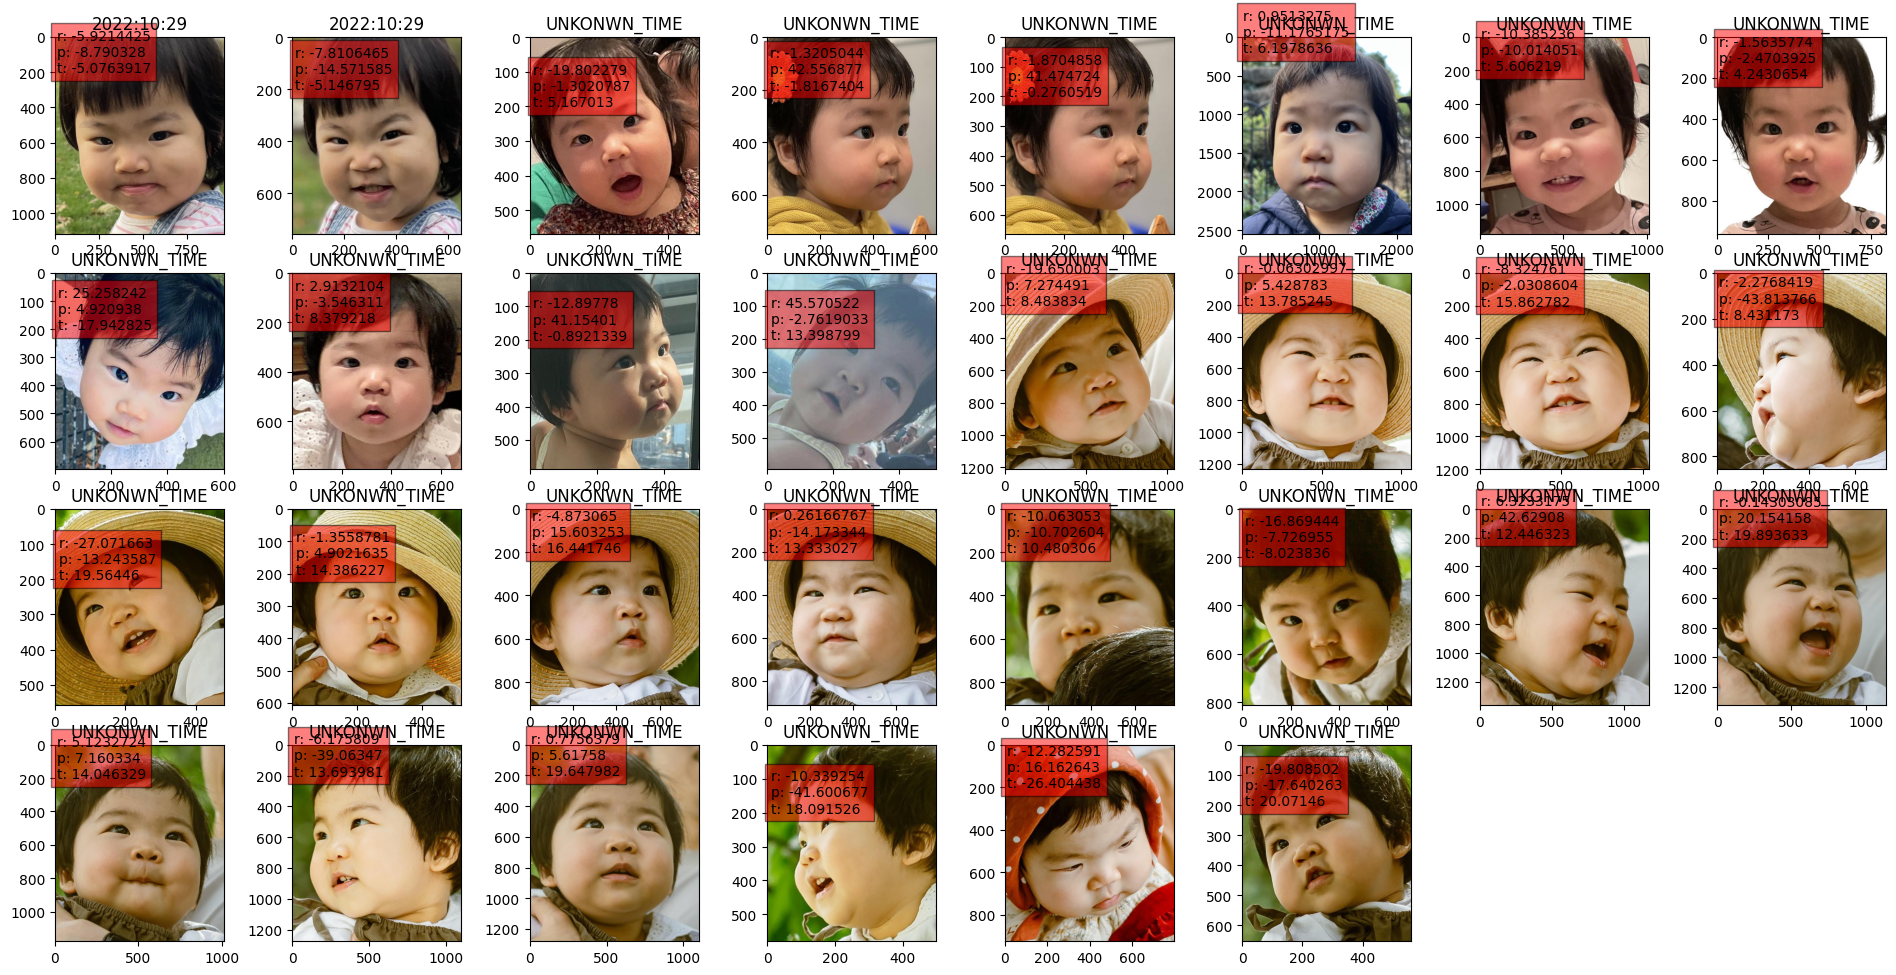

In [59]:
from IPython import display

# use plt to show the images in a grid
image_w = 3
image_h = 3
columns = 8
rows = 8
fig = plt.figure(figsize=(columns, rows))

# set the size of the image
fig.set_size_inches(image_w * columns, image_h * rows)

for i in range(1, min(columns*rows +1, len(url_list)+1)):
    image, file_name, user_comment = read_image_info_from_url(url_list[i-1])
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    face_json = json.loads(user_comment)
    face_json.pop('boundingPoly')
    face_json.pop('fdBoundingPoly')
    face_json.pop('landmarks')

    # add the face info to the image as text
    anno_string = f"r: {face_json['rollAngle']}\np: {face_json['panAngle']}\nt: {face_json['tiltAngle']}"
    plt.text(10, 200, anno_string, color='black', fontsize=10, bbox = dict(facecolor = 'red', alpha = 0.5))
    
    # add date as title
    date = re.findall("auto_detected_face_image_(.+)_\d+_", file_name)[0]
    plt.title(date)
    # plt.axis('off')
